<h3>Consider the health care dataset that consists of several imaging details from patients that had
a biopsy to test for breast cancer. The variable diagnosis classifies the biopsied tissue as M =
malignant or B = benign. Describe and pre process the dataset. Use KNN supervised learning
model to predict Diagnosis using texture_mean and radius_mean . Analyse the model using
different k values and display the performance of the model.</h3>

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *
import math

In [8]:
df = pd.read_csv("./Dataset/breastcancer.csv")
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              564 non-null    float64
 3   texture_mean             561 non-null    float64
 4   perimeter_mean           561 non-null    float64
 5   area_mean                564 non-null    float64
 6   smoothness_mean          566 non-null    float64
 7   compactness_mean         566 non-null    float64
 8   concavity_mean           566 non-null    float64
 9   concave points_mean      562 non-null    float64
 10  symmetry_mean            564 non-null    float64
 11  fractal_dimension_mean   564 non-null    float64
 12  radius_se                568 non-null    float64
 13  texture_se               568 non-null    float64
 14  perimeter_se             5

In [11]:
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                5
texture_mean               8
perimeter_mean             8
area_mean                  5
smoothness_mean            3
compactness_mean           3
concavity_mean             3
concave points_mean        7
symmetry_mean              5
fractal_dimension_mean     5
radius_se                  1
texture_se                 1
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [12]:
for i in df:
    if df[i].isna().sum()>0:
        df[i]=df[i].fillna(df[i].mean())
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [16]:
x = df[['texture_mean','radius_mean']] #Input feature
y = df['diagnosis']

In [17]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size=0.2, random_state=42)

In [33]:
knn = KNeighborsClassifier(n_neighbors=int(math.sqrt(len(xtrain)))) #Model object
knn.fit(xtrain,ytrain) 
predict = knn.predict(xtest)

In [34]:
#Confusion matrix
confmat = confusion_matrix(ytest, predict)
confmat

array([[63,  7],
       [11, 33]])

<Axes: >

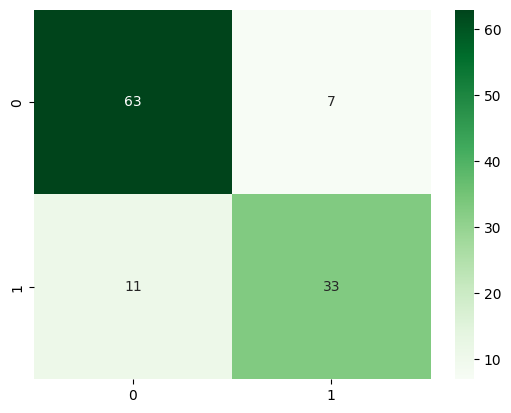

In [35]:
#plot matrix using heatmap
sns.heatmap(confmat, cmap="Greens", annot=True)

In [39]:
print(f"Accuracy: {accuracy_score(ytest,predict)}")
print(f"Precision:{precision_score(ytest, predict, pos_label='B')}")
print(f"Recall: {recall_score(ytest, predict, pos_label='B')}")
print(f"F1 Score: {f1_score(ytest, predict, pos_label='B')}")

Accuracy: 0.8421052631578947
Precision:0.8513513513513513
Recall: 0.9
F1 Score: 0.875


In [47]:
#Testing with custom data
v1 = [20,20]
v2 = [16,7.57]
knn.predict([v1,v2,v3])

C:\Users\mdjun\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['M', 'B', 'M'], dtype=object)

In [51]:
graphSize = 100
modelAccuracyList = []
for i in range(1,graphSize):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain, ytrain)
    modelAccuracy = knn.score(xtrain, ytrain)
    modelAccuracyList.append(modelAccuracy)

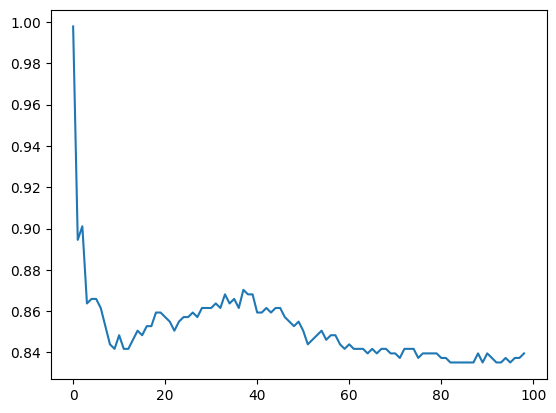

In [53]:
plt.plot(range(0,graphSize-1), modelAccuracyList)